In [13]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import GillespieSim as gs

LacI ---| TetR,

TetR ---| Alpha Cl,

Alpha Cl ---| LacI

In [14]:
repressilator = gs.ReactionModel(
                                species = {
                                                'tetR': 0,
                                                'lacI': 0,
                                                'alphacl': 0,
                                                'GFP': 0,

                                                'tetR_mRNA': 0,
                                                'lacI_mRNA': 0, 
                                                'alphacl_mRNA': 0,
                                                'GFP_mRNA': 0,
                                                
                                                'complex_tetR': 0,
                                                'complex_lacI': 0,
                                                'complex_alphacl': 0,
                                                'complex_GFP': 0,

                                                'promoter_tetR': 1,
                                                'promoter_lacI': 1,
                                                'promoter_alphacl': 1,
                                                'promoter_GFP': 1
                                                },

                                propensities = {
                                                'kc_tetR': 20,
                                                'kc_lacI': 20,
                                                'kc_alphacl': 20,
                                                'kc_GFP': 20,

                                                'kd_tetR': np.log(2)/10,
                                                'kd_lacI': np.log(2)/10,
                                                'kd_alphacl': np.log(2)/10,
                                                'kd_GFP': np.log(2)/10,

                                                'ka_c_tetR': 0.95,
                                                'ka_c_lacI': 0.95,
                                                'ka_c_alphacl': 0.95,
                                                'ka_c_GFP': 0.95,

                                                'kd_c_tetR': 0.267,
                                                'kd_c_lacI': 0.267,
                                                'kd_c_alphacl': 0.267,
                                                'kd_c_GFP': 0.267,

                                                'kc_mRNA_tetR': 2,
                                                'kc_mRNA_lacI': 2,
                                                'kc_mRNA_alphacl': 2,
                                                'kc_mRNA_GFP': 2,

                                                'kd_mRNA_tetR': np.log(2)/2,
                                                'kd_mRNA_lacI': np.log(2)/2,
                                                'kd_mRNA_alphacl': np.log(2)/2,
                                                'kd_mRNA_GFP': np.log(2)/2
                                                },


                                reactions = {
                                                'PctetR':       ['kc_tetR', 'tetR_mRNA'],
                                                'PclacI':       ['kc_lacI', 'lacI_mRNA'],
                                                'Pcalphacl':    ['kc_alphacl', 'alphacl_mRNA'],
                                                'GFP_cre' :     ['kc_GFP', 'GFP_mRNA'],

                                                'PdtetR':       ['kd_tetR', 'tetR'],
                                                'PdlacI':       ['kd_lacI', 'lacI'],
                                                'Pdalphacl':    ['kd_alphacl', 'alphacl'],                                               
                                                'GFP_des':      ['kd_GFP', 'GFP'],

                                                'Ac_tetR':      ['ka_c_tetR', 'lacI', 'promoter_tetR'],
                                                'Ac_lacI':      ['ka_c_lacI', 'alphacl', 'promoter_lacI'],
                                                'Ac_alphacl':   ['ka_c_alphacl', 'tetR', 'promoter_alphacl'],
                                                'Ac_GFP':       ['ka_c_GFP', 'tetR', 'promoter_GFP'],

                                                'Dc_tetR':      ['kd_c_tetR', 'complex_tetR'],
                                                'Dc_lacI':      ['kd_c_lacI', 'complex_lacI'],
                                                'Dc_alphacl':   ['kd_c_alphacl', 'complex_alphacl'],
                                                'Dc_GFP' :      ['kd_c_GFP', 'complex_GFP'],

                                                'Tr_mRNA_tetR':         ['kc_mRNA_tetR', 'promoter_tetR'],
                                                'Tr_mRNA_lacI':         ['kc_mRNA_lacI', 'promoter_lacI'],
                                                'Tr_mRNA_alphacl':      ['kc_mRNA_alphacl', 'promoter_alphacl'],
                                                'Tr_mRNA_GFP':          ['kc_mRNA_GFP', 'promoter_GFP'],
                
                                                'Dc_mRNA_tetR':         ['kd_mRNA_tetR', 'tetR_mRNA'],
                                                'Dc_mRNA_lacI':         ['kd_mRNA_lacI', 'lacI_mRNA'],
                                                'Dc_mRNA_alphacl':      ['kd_mRNA_alphacl', 'alphacl_mRNA'],
                                                'Dc_mRNA_GFP':          ['kd_mRNA_GFP', 'GFP_mRNA']
                                                },
                                
                                q = {   'PctetR':       {'create': ['tetR']},
                                        'PclacI':       {'create': ['lacI']},
                                        'Pcalphacl':    {'create': ['alphacl']},
                                        'GFP_cre':      {'create': ['GFP']},

                                        'PdtetR':       {'destroy': ['tetR']},
                                        'PdlacI':       {'destroy': ['lacI']},
                                        'Pdalphacl':    {'destroy': ['alphacl']},           
                                        'GFP_des':      {'destroy': ['GFP']},

                                        'Ac_tetR' :     {'create': ['complex_tetR'],    'destroy': ['lacI', 'promoter_tetR']},
                                        'Ac_lacI' :     {'create': ['complex_lacI'],    'destroy': ['alphacl', 'promoter_lacI']},
                                        'Ac_alphacl' :  {'create': ['complex_alphacl'], 'destroy': ['tetR', 'promoter_alphacl']},
                                        'Ac_GFP':       {'create': ['complex_GFP'],     'destroy': ['tetR', 'promoter_GFP']},

                                        'Dc_tetR' :     {'create': ['lacI','promoter_tetR'],   'destroy': ['complex_tetR']},
                                        'Dc_lacI' :     {'create': ['alphacl','promoter_lacI'],'destroy': ['complex_lacI']},
                                        'Dc_alphacl' :  {'create': ['tetR', 'promoter_alphacl'],'destroy': ['complex_alphacl']},
                                        'Dc_GFP' :      {'create': ['tetR', 'promoter_GFP'],    'destroy': ['complex_GFP']},

                                        'Tr_mRNA_tetR' :        {'create': ['tetR_mRNA']},
                                        'Tr_mRNA_lacI' :        {'create': ['lacI_mRNA']},
                                        'Tr_mRNA_alphacl' :     {'create': ['alphacl_mRNA']},
                                        'Tr_mRNA_GFP' :         {'create': ['GFP_mRNA']},

                                        'Dc_mRNA_tetR' :        {'destroy': ['tetR_mRNA']},
                                        'Dc_mRNA_lacI' :        {'destroy': ['lacI_mRNA']},
                                        'Dc_mRNA_alphacl' :     {'destroy': ['alphacl_mRNA']},
                                        'Dc_mRNA_GFP' :         {'destroy': ['GFP_mRNA']}}
                                )

In [15]:
simulation = gs.Gillespie(tmax=1200, sampling_time= 1, reaction_model=repressilator, model_name='repressilator', cells=1)
simulation.simulate()


100%|██████████| 1/1 [00:24<00:00, 24.49s/it]


In [16]:
df = pd.read_csv('repressilator.csv', delimiter='|')
df

,tetR,lacI,alphacl,GFP,tetR_mRNA,lacI_mRNA,alphacl_mRNA,GFP_mRNA,complex_tetR,complex_lacI,complex_alphacl,complex_GFP,promoter_tetR,promoter_lacI,promoter_alphacl,promoter_GFP,time,cell
0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0.0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0.1,1
2,0,0,1,1,0,0,1,1,0,0,0,0,1,1,1,1,0.2,1
3,0,0,3,3,0,0,1,1,0,0,0,0,1,1,1,1,0.3,1
4,0,0,4,4,0,0,1,1,0,0,0,0,1,1,1,1,0.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11996,278,0,5,3,0,0,0,0,1,1,1,1,0,0,0,0,1199.6,1
11997,275,0,5,3,0,0,0,0,1,1,1,1,0,0,0,0,1199.7,1
11998,274,0,5,2,0,0,0,0,1,1,1,1,0,0,0,0,1199.8,1
11999,272,0,5,2,0,0,0,0,1,1,1,1,0,0,0,0,1199.9,1


Text(0.5, 0, 'Time (min)')

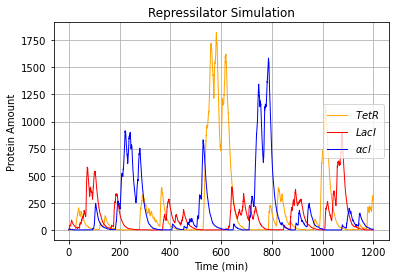

In [17]:
cells = df.cell.unique()
lw = 0.2
alpha_fig = 0.8

plt.plot(df.time[df.cell==1], df.tetR[df.cell==1], '-', color='orange', lw=1, label= r'$TetR$')
plt.plot(df.time[df.cell==1], df.lacI[df.cell==1], '-', color='red', lw=1, label= r'$LacI$')
plt.plot(df.time[df.cell==1], df.alphacl[df.cell==1], '-', color='blue', lw=1, label= r'$\alpha cl$')
plt.grid(True)
plt.legend(loc=7)
plt.title('Repressilator Simulation')
plt.ylabel('Protein Amount')
plt.xlabel('Time (min)')
# plt.yscale('log')
# plt.xlim(0,10)
# plt.ylim(0, 100)

Text(0, 0.5, 'GFP')

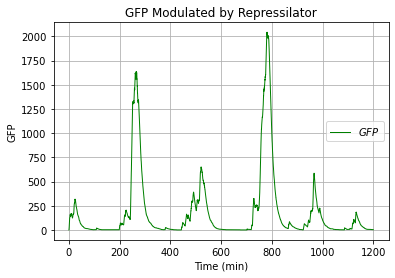

In [18]:
cells = df.cell.unique()
lw = 1
alpha_fig = 0.8
# for cell in cells:
#     plt.plot(df.time[df.cell==cell], df.GFP[df.cell==cell], '-g', lw=lw, alpha=alpha_fig)
plt.grid(True)
plt.plot(df.time[df.cell==1], df.GFP[df.cell==1], '-g', lw=lw, label= r'$GFP$')
plt.legend(loc=5)
plt.title('GFP Modulated by Repressilator')
plt.xlabel('Time (min)')
plt.ylabel('GFP')
# plt.yscale('log')
# plt.xlim([0,500])

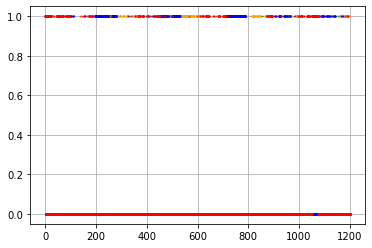

In [19]:
alpha_fig = 0.5
ms = 1
cell = 1
plt.plot(df.time[df.cell==cell], df.promoter_GFP[df.cell==cell], 'o', color='green', ms=ms, alpha=alpha_fig)
plt.plot(df.time[df.cell==cell], df.promoter_tetR[df.cell==cell], 'o', color='orange', ms=ms, alpha=alpha_fig)
plt.plot(df.time[df.cell==cell], df.promoter_alphacl[df.cell==cell], 'o', color='blue', ms=ms, alpha=alpha_fig)
plt.plot(df.time[df.cell==cell], df.promoter_lacI[df.cell==cell], 'o', color='red', ms=ms, alpha=alpha_fig)
plt.grid(True)

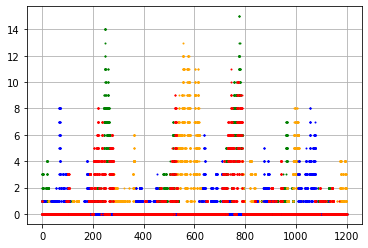

In [20]:
alpha_fig = 1
ms = 1
cell = 1

plt.plot(df.time[df.cell==cell], df.GFP_mRNA[df.cell==cell], 'o', color='green', ms=ms, alpha=alpha_fig)
plt.plot(df.time[df.cell==cell], df.tetR_mRNA[df.cell==cell], 'o', color='orange', ms=ms, alpha=alpha_fig)
plt.plot(df.time[df.cell==cell], df.lacI_mRNA[df.cell==cell], 'o', color='blue', ms=ms, alpha=alpha_fig)
plt.plot(df.time[df.cell==cell], df.alphacl_mRNA[df.cell==cell], 'o', color='red', ms=ms, alpha=alpha_fig)

plt.grid(True)
# plt.xscale('log')

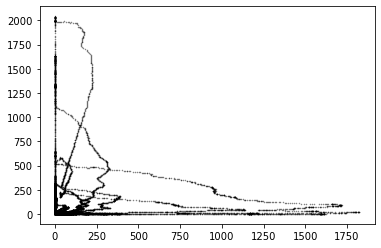

In [21]:
cells = df.cell.unique()
lw = 0.8
alpha_fig = 0.5

for cell in cells:
    plt.plot(df.tetR[df.cell==cell], df.GFP[df.cell==cell], 'o', color='black', ms=0.5, lw=lw, alpha=alpha_fig)
# plt.yscale('log')
# plt.xscale('log')

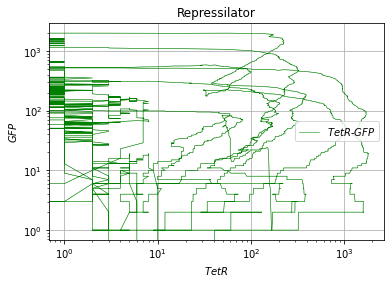

In [22]:
cells = df.cell.unique()
lw = 0.5
alpha_fig = 0.5

for cell in cells:
    plt.plot(df.tetR[df.cell==cell], df.GFP[df.cell==cell], '-', color='green', lw=lw, alpha=alpha_fig)
plt.plot(df.tetR[df.cell==1], df.GFP[df.cell==1], '-', color='green', lw=lw, label= r'$TetR$-$GFP$')
plt.grid(True)
plt.legend(loc=7)
plt.title('Repressilator')
plt.ylabel(r'$GFP$')
plt.xlabel(r'$TetR$')
plt.yscale('log')
plt.xscale('log')

In [23]:
5 * 10 ** -4

0.0005

In [24]:
1.66*10**-15

1.66e-15